<a href="https://colab.research.google.com/github/kittimaxz/DWDM21/blob/main/Chapter8_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-means

## Generate Data

In [16]:
from sklearn.datasets import make_blobs

In [17]:
X,y = make_blobs(n_samples=500,centers=3,n_features=2,random_state=6)

In [18]:
X.shape

(500, 2)

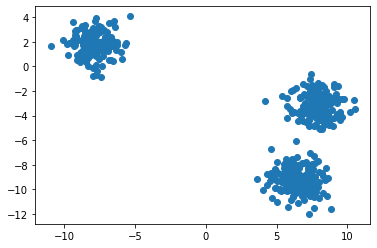

In [19]:
from matplotlib import  pyplot as plt
plt.scatter(X[:,0],X[:,1])

## Clustering

###Import

In [20]:
from sklearn.cluster import KMeans

###Define

In [21]:
kmeans=KMeans(n_clusters=2,random_state=6)

###Train-Predict

In [22]:
y_clust = kmeans.fit_predict(X)

In [23]:
y_clust

array([1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,

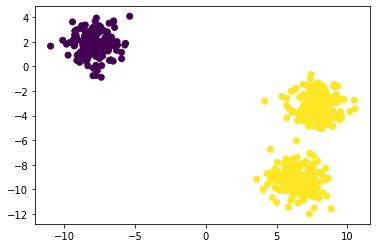

In [25]:
plt.scatter(X[:,0],X[:,1],c=y_clust)

**3 Clusters**

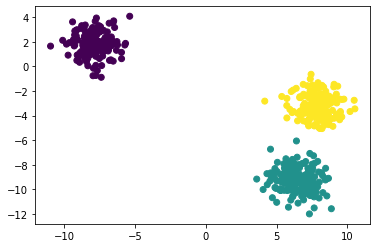

In [27]:
#define
kmeans=KMeans(n_clusters=3,random_state=6)
#fit-predict
y_clust = kmeans.fit_predict(X)
#plot
plt.scatter(X[:,0],X[:,1],c=y_clust)

**4 Clusters**

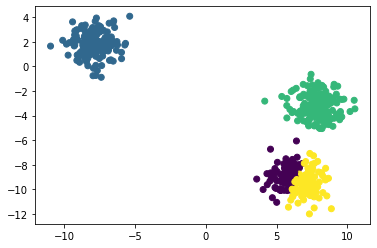

In [28]:
#define
kmeans=KMeans(n_clusters=4,random_state=6)
#fit-predict
y_clust = kmeans.fit_predict(X)
#plot
plt.scatter(X[:,0],X[:,1],c=y_clust)

**5 Clusters**

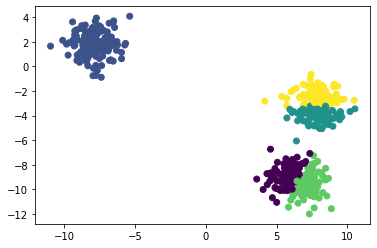

In [32]:
#define
kmeans=KMeans(n_clusters=5,random_state=6,init='random')
#fit-predict
y_clust = kmeans.fit_predict(X)
#plot
plt.scatter(X[:,0],X[:,1],c=y_clust)

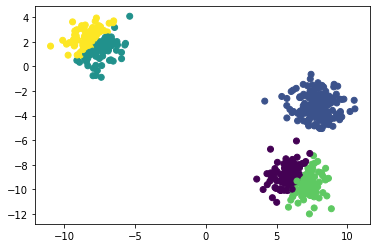

In [33]:
#define
kmeans=KMeans(n_clusters=5,random_state=14,init='random')
#fit-predict
y_clust = kmeans.fit_predict(X)
#plot
plt.scatter(X[:,0],X[:,1],c=y_clust)

##Example Application(Color Quanization)

In [34]:
import cv2
import os

In [37]:
img = cv2.imread('/content/kimjaehwan.jpg')

In [38]:
img.shape

(626, 430, 3)

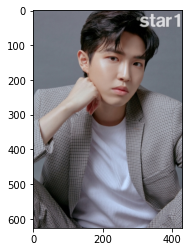

In [40]:
RGB_img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(RGB_img)

##นับจำนวนสี

In [41]:
import numpy as  np

###จัดกลุ่มสีให้เหลือ 16 สี

In [43]:
np.unique(np.reshape(RGB_img,(RGB_img.shape[0]*RGB_img.shape[1],3)),axis=0).shape

(25880, 3)

###แปลงข้อมูลให้อยู่ในรูป row-column

In [44]:
myquantize = KMeans(n_clusters=16,random_state=6)

In [45]:
img_row = np.reshape(RGB_img,(RGB_img.shape[0]*RGB_img.shape[1],3))
img_row.shape

(269180, 3)

In [46]:
final_color = myquantize.fit_predict(img_row)

###ใช้ centroid เป็นตัวแทนสี

In [47]:
centroid = myquantize.cluster_centers_

In [48]:
centroid

array([[113.83802012, 117.61741255, 127.79455304],
       [ 56.076823  ,  47.14141677,  44.82931113],
       [167.85017484, 173.5357672 , 191.52504   ],
       [ 88.38474587,  83.98429352,  88.95394861],
       [  8.35525692,   8.1887747 ,   5.08237154],
       [189.843292  , 200.55005637, 222.43269448],
       [135.23804526, 134.24260814, 145.18434021],
       [151.91218931, 153.31983926, 165.70293198],
       [ 70.27654256,  66.34344165,  68.66708328],
       [159.06046863, 127.60831444, 116.63325775],
       [ 32.98492422,  28.9292232 ,  24.87185591],
       [186.77441365, 160.25575693, 148.50682303],
       [104.3051356 , 101.22567802, 108.74564339],
       [129.01740506,  97.38425024,  87.55026777],
       [104.4630313 ,  69.29615963,  58.99138991],
       [199.35390183, 190.24672915, 186.54978194]])

###แทนสีคืนลงไป

In [51]:
new_img = np.zeros(RGB_img.shape)
for i in range(RGB_img.shape[0]):
    for j in range(RGB_img.shape[1]):
        new_img[i,j,:] = centroid[myquantize.predict([RGB_img[i,j,:]]),:]

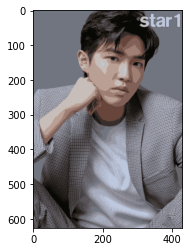

In [52]:
plt.imshow(new_img/255)

In [53]:
plt.imsave('img.jpg',new_img/255)

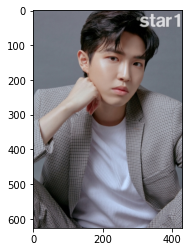

In [54]:
plt.imshow(RGB_img)